## Transfer Learning Resenet50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/newwwwwww/train'
valid_path = '/content/drive/MyDrive/newwwwwww/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#resnet=ResNet101V2(input_shape=IMAGE_SIZE + [3],include_top=False, weights='imagenet')




94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/dataset/train/*')
folders

['/content/drive/MyDrive/dataset/train/roten apple (1)',
 '/content/drive/MyDrive/dataset/train/rotten bannana (1)',
 '/content/drive/MyDrive/dataset/train/roten orange (1)',
 '/content/drive/MyDrive/dataset/train/fresh applel (1)',
 '/content/drive/MyDrive/dataset/train/fresh orange (1)',
 '/content/drive/MyDrive/dataset/train/fresh banana (1)']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
xx=model.summary()
xx

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 1200 images belonging to 6 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 100 images belonging to 6 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
120/120 [==============================] - 27s 193ms/step - loss: 3.4436 - accuracy: 0.3475 - val_loss: 3.2824 - val_accuracy: 0.4500
Epoch 2/50
120/120 [==============================] - 22s 180ms/step - loss: 2.3627 - accuracy: 0.4167 - val_loss: 2.5363 - val_accuracy: 0.4800
Epoch 3/50
120/120 [==============================] - 22s 184ms/step - loss: 2.0334 - accuracy: 0.4642 - val_loss: 0.8533 - val_accuracy: 0.6800
Epoch 4/50
120/120 [==============================] - 22s 179ms/step - loss: 1.9197 - accuracy: 0.4883 - val_loss: 1.1851 - val_accuracy: 0.5900
Epoch 5/50
120/120 [==============================] - 22s 181ms/step - loss: 2.3731 - accuracy: 0.4775 - val_loss: 1.8288 - val_accuracy: 0.6200
Epoch 6/50
120/120 [==============================] - 22s 179ms/step - loss: 2.3601 - accuracy: 0.5058 - val_loss: 3.0728 - val_accuracy: 0.3900
Epoch 7/50
120/120 [==============================] - 22s 184ms/step - loss: 1.7821 - accuracy: 0.5417 - val_loss: 3.7033 - val_ac

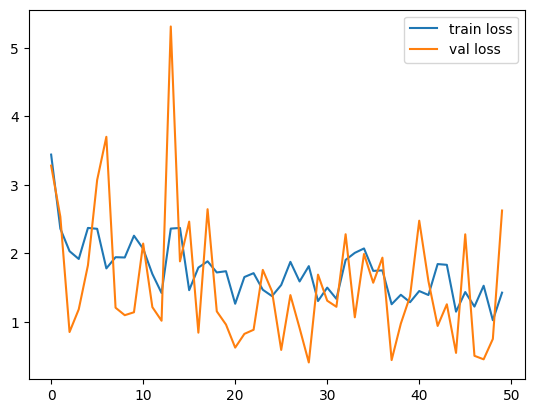

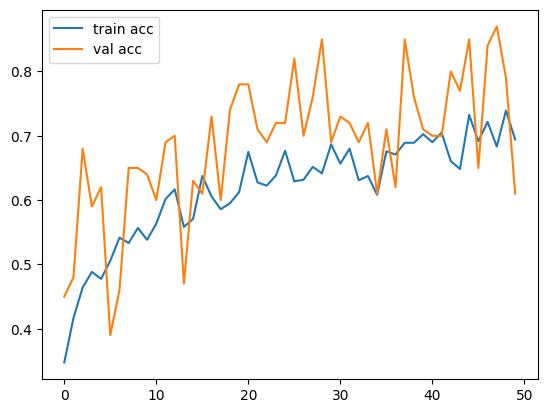

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('fruitresnet50.h5')

# New Section

In [ ]:

y_pred = model.predict(test_set)


10/10 [==============================] - 2s 67ms/step


In [ ]:
y_pred

array([[1.39120151e-04, 9.55559969e-01, 4.36642495e-06, 5.02606039e-04,
        7.40164041e-11, 4.37938720e-02],
       [1.40646060e-29, 0.00000000e+00, 1.55655230e-32, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [7.73273885e-01, 6.50134460e-12, 1.87963578e-09, 2.26726100e-01,
        1.56413578e-13, 1.30677856e-11],
       [1.15531066e-11, 2.33900421e-12, 9.20674214e-12, 4.18159851e-17,
        1.17487947e-18, 1.00000000e+00],
       [9.99963164e-01, 1.08905398e-15, 1.31494812e-06, 3.55522388e-05,
        8.11623880e-13, 3.12639762e-17],
       [4.05118783e-08, 9.99998808e-01, 1.13883561e-06, 5.13382540e-16,
        7.43888390e-14, 1.13733765e-10],
       [9.55590248e-01, 2.69596603e-06, 2.80943357e-08, 6.31275589e-06,
        2.46321099e-15, 4.44006696e-02],
       [8.79506290e-01, 1.24915065e-08, 3.10819015e-09, 6.21517822e-02,
        1.22579920e-07, 5.83418347e-02],
       [9.85510826e-01, 6.87685908e-10, 1.44891655e-02, 4.04749485e-22,
        4.30813642e-13, 

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_true=test_set.classes

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_true,y_pred)
cm

array([[ 9,  5,  1,  2,  0,  3],
       [ 9,  6,  2,  2,  0,  1],
       [10,  4,  1,  2,  0,  3],
       [ 4,  0,  2,  0,  0,  4],
       [ 5,  2,  1,  1,  0,  1],
       [14,  1,  0,  0,  0,  5]])

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_true,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.18      0.45      0.25        20
           1       0.33      0.30      0.32        20
           2       0.14      0.05      0.07        20
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.29      0.25      0.27        20

    accuracy                           0.21       100
   macro avg       0.16      0.18      0.15       100
weighted avg       0.19      0.21      0.18       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


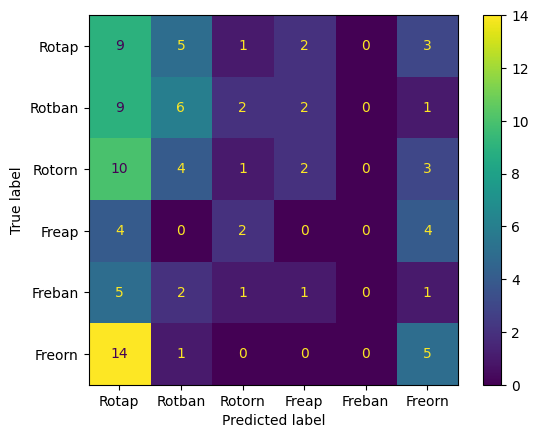

In [ ]:

from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Rotap','Rotban','Rotorn','Freap','Freban','Freorn'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()